# Projet d'apprentissage Supervisé : Natacha Babalola

# Sommaire

- [1. Chargement des fichiers](#section-1)
- [2. Analyse Descriptive](#section-2)
- [3. Fusion des données](#section-3)
- [4. Exploration des données](#section-4)
- [5. Sélection des algorithmes d'apprentissage supervisé](#section-5)
- [7. Approche complexe ](#section-6)
- [8. Prédiction avec le modèle final sur l'ensemble de Test](#section-7)



Pour ce projet, J'ai entrepris une approche supervisée en utilisant les ensembles de données fournis. J'ai d'abord effectué un prétraitement des données, comprenant l'analyse des valeurs manquantes, suivi d'une fusion pour obtenir un fichier final pour les ensembles d'entraînement et de test. Avec un total de 99 985 données, nous avons pris soin d'évaluer chaque modèle en fonction de sa pertinence et de sa capacité à absorber les variances, en tenant compte de la quantité de données.

Pour exploiter au maximum nos données, j'ai procédé à un encodage afin d'utiliser la quasi-totalité des colonnes pour l'entraînement du modèle. Nous avons exploré plusieurs modèles, notamment la régression linéaire, le Random Forest, le K-Nearest Neighbors, le Support Vector Machine, l'approche par Ridge, un ajustement via un modèle polynomiale, et enfin le GradientBoostingRegressor.

Le modèle final obtenu à l'aide du GradientBoosting, avec les meilleurs hyperparamètres ajustés, a abouti à un MSE approchant 1474.40, alors que nous avons commencé avec un MSE de 20 197.93. 

À la fin du projet, nous pourrons exporter deux fichiers de prévisions : le premier, Prediction_merge, contiendra les résultats de chaque modèle sur l'ensemble d'entraînement, tandis que le fichier Prevision.CSV regroupera les prédictions du modèle sur l'ensemble de test.

Pour les prédictions sur l'ensemble de Test, notre objectif est d'obtenir un MSE proche de celui obtenu lors de la phase d'entraînement, ainsi qu'un R2 de proche des 92% obtenu en utilisant votre modèle final de GradientBoosting sur l'ensemble de test de notre ensemble d'entraînement. Ce coefficient de dertermination signifie que votre modèle a bien performé sur ces données spécifiques. Cependant, le fait d'obtenir un R2 élevé sur l'ensemble de test de l'ensemble d'entraînement ne garantit pas nécessairement que nous obtiendrons le même R2 sur de nouvelles données.

Lorsque nous appliquons notre modèle à de nouvelles données (ensemble de test final pour lequel nous n'avons pas les vraies valeurs), il est possible que la relation entre nos variables indépendantes et la variable cible soit différente. Par conséquent, il est difficile de prédire exactement quel R2 nous obtiendrons sur ces nouvelles données.
Nous attendons à ce que notre modèle performe relativement bien sur de nouvelles données similaires à celles sur lesquelles il a été entraîné.

# 1. Chargement des fichiers <a id="section-1"></a>

In [1]:
#import des bibliothèques

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

/Users/tachalola/opt/anaconda3/lib/python3.9/site-packages/seaborn/_statistics.py:31: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.stats import gaussian_kde


In [2]:
import pandas as pd

# Charger les fichiers CSV
learn_dataset = pd.read_csv("learn_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
learn_dataset_job = pd.read_csv("learn_dataset_job.csv")
test_dataset_job = pd.read_csv("test_dataset_job.csv")
learn_dataset_emp = pd.read_csv("learn_dataset_emp.csv")
test_dataset_emp = pd.read_csv("test_dataset_emp.csv")
learn_dataset_CLUB = pd.read_csv("learn_dataset_sport.csv")
test_dataset_CLUB = pd.read_csv("test_dataset_sport.csv")


# 2. Analyse Descriptive <a id="section-2"></a>


###  Traiter les données manquantes et les valeurs abbérantes

In [4]:
# Afficher un résumé des données
summary = learn_dataset.describe()

# Afficher le résumé
print(summary)

                Uid      age_2020        target
count  49993.000000  49993.000000  49993.000000
mean   50008.485868     49.692197    445.197255
std    28820.426850     20.692217    144.556769
min        1.000000     15.000000      1.799885
25%    25058.000000     33.000000    340.438813
50%    50054.000000     49.000000    428.045818
75%    74910.000000     66.000000    539.565276
max    99985.000000    109.000000   1094.135881


In [5]:
info = learn_dataset.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49993 entries, 0 to 49992
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uid              49993 non-null  int64  
 1   Familty_type     49993 non-null  object 
 2   Highest_diploma  49993 non-null  object 
 3   insee_code       49993 non-null  object 
 4   Job_42           49993 non-null  object 
 5   ACT              49993 non-null  object 
 6   sex              49993 non-null  object 
 7   Studying         49993 non-null  bool   
 8   age_2020         49993 non-null  int64  
 9   target           49993 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 3.5+ MB
None


In [6]:
print(learn_dataset.isnull().all())

Uid                False
Familty_type       False
Highest_diploma    False
insee_code         False
Job_42             False
ACT                False
sex                False
Studying           False
age_2020           False
target             False
dtype: bool


In [7]:
print(learn_dataset_job.isnull().all())

Uid                  False
WORK_CONDITION       False
TERMS_OF_EMP         False
working_hours        False
JOB_DEP              False
Eco_sect             False
Employer_category    False
job_category         False
Job_desc             False
EMOLUMENT            False
employee_count       False
dtype: bool


In [8]:
print(learn_dataset_emp.isnull().all())

Uid    False
emp    False
dtype: bool


In [9]:
print(learn_dataset_CLUB.isnull().all())

Uid     False
CLUB    False
dtype: bool


In [10]:
print(learn_dataset.isnull().sum())

Uid                0
Familty_type       0
Highest_diploma    0
insee_code         0
Job_42             0
ACT                0
sex                0
Studying           0
age_2020           0
target             0
dtype: int64


In [11]:
print(learn_dataset_job.isnull().sum())

Uid                   0
WORK_CONDITION        1
TERMS_OF_EMP          1
working_hours         7
JOB_DEP              16
Eco_sect              0
Employer_category     1
job_category          0
Job_desc              0
EMOLUMENT             0
employee_count        1
dtype: int64


In [12]:
print(learn_dataset_emp.isnull().sum())

Uid    0
emp    0
dtype: int64


In [13]:
print(learn_dataset_CLUB.isnull().sum())

Uid     0
CLUB    0
dtype: int64


In [14]:
print(learn_dataset_job.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19082 entries, 0 to 19081
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uid                19082 non-null  int64  
 1   WORK_CONDITION     19081 non-null  object 
 2   TERMS_OF_EMP       19081 non-null  object 
 3   working_hours      19075 non-null  float64
 4   JOB_DEP            19066 non-null  object 
 5   Eco_sect           19082 non-null  object 
 6   Employer_category  19081 non-null  object 
 7   job_category       19082 non-null  object 
 8   Job_desc           19082 non-null  object 
 9   EMOLUMENT          19082 non-null  int64  
 10  employee_count     19081 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.6+ MB
None


#### Commentaire : remplacer toutes les valeurs manquantes par la valeur valide précédente, ce qui nous permet d'avoir un tableau complet.

## 3. Fusion des données <a id="section-3"></a>


### 3.1 Données d'apprentissage

In [15]:
# Vérifier s'il y a des doublons dans la colonne 'Uid' de chaque DataFrame
print("Nombre de doublons dans learn_dataset : ", learn_dataset.duplicated(subset=['Uid']).sum())
print("Nombre de doublons dans learn_datataset_job : ", learn_dataset_job.duplicated(subset=['Uid']).sum())
print("Nombre de doublons dans learn_dataset_emp : ", learn_dataset_emp.duplicated(subset=['Uid']).sum())
print("Nombre de doublons dans learn_dataset_CLUB : ", learn_dataset_CLUB.duplicated(subset=['Uid']).sum())

# Supprimer les doublons dans la colonne 'Uid' de chaque DataFrame
learn_dataset = learn_dataset.drop_duplicates(subset=['Uid'])
learn_dataset_job = learn_dataset_job.drop_duplicates(subset=['Uid'])
learn_dataset_emp = learn_dataset_emp.drop_duplicates(subset=['Uid'])
learn_dataset_CLUB = learn_dataset_CLUB.drop_duplicates(subset=['Uid'])

# Fusionner les DataFrames sans doublons au niveau de la colonne de jointure
learn_dataset_merge = pd.merge(learn_dataset, learn_dataset_job, on='Uid', how='outer')
learn_dataset_merge = pd.merge(learn_dataset_merge, learn_dataset_emp, on='Uid', how='outer')
learn_dataset_merge = pd.merge(learn_dataset_merge, learn_dataset_CLUB, on='Uid', how='outer')

# Supprimer les doublons de la colonne 'Uid' après la fusion
learn_dataset_merge = learn_dataset_merge.drop_duplicates(subset=['Uid'])

# Afficher les informations sur le DataFrame fusionné
print(learn_dataset_merge.info())


Nombre de doublons dans learn_dataset :  0
Nombre de doublons dans learn_datataset_job :  0
Nombre de doublons dans learn_dataset_emp :  0
Nombre de doublons dans learn_dataset_CLUB :  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49993 entries, 0 to 49992
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uid                49993 non-null  int64  
 1   Familty_type       49993 non-null  object 
 2   Highest_diploma    49993 non-null  object 
 3   insee_code         49993 non-null  object 
 4   Job_42             49993 non-null  object 
 5   ACT                49993 non-null  object 
 6   sex                49993 non-null  object 
 7   Studying           49993 non-null  bool   
 8   age_2020           49993 non-null  int64  
 9   target             49993 non-null  float64
 10  WORK_CONDITION     19081 non-null  object 
 11  TERMS_OF_EMP       19081 non-null  object 
 12  working_hours      19075 no

### 3.2 Données de test

In [16]:
# Vérifier s'il y a des doublons dans la colonne 'Uid' de chaque DataFrame
print("Nombre de doublons dans test_dataset : ", test_dataset.duplicated(subset=['Uid']).sum())
print("Nombre de doublons dans test_dataset_job : ",test_dataset_job.duplicated(subset=['Uid']).sum())
print("Nombre de doublons dans test_dataset_emp : ", test_dataset_emp.duplicated(subset=['Uid']).sum())
print("Nombre de doublons dans test_dataset_CLUB : ", test_dataset_CLUB.duplicated(subset=['Uid']).sum())

# Supprimer les doublons dans la colonne 'Uid' de chaque DataFrame
test_dataset = test_dataset.drop_duplicates(subset=['Uid'])
test_dataset_job = test_dataset_job.drop_duplicates(subset=['Uid'])
test_dataset_emp = test_dataset_emp.drop_duplicates(subset=['Uid'])
test_dataset_CLUB = test_dataset_CLUB.drop_duplicates(subset=['Uid'])

# Fusionner les DataFrames sans doublons au niveau de la colonne de jointure
test_dataset_merge = pd.merge(test_dataset, test_dataset_job, on='Uid', how='outer')
test_dataset_merge = pd.merge(test_dataset_merge, test_dataset_emp, on='Uid', how='outer')
test_dataset_merge = pd.merge(test_dataset_merge, test_dataset_CLUB, on='Uid', how='outer')

# Supprimer les doublons de la colonne 'Uid' après la fusion
test_dataset_merge = test_dataset_merge.drop_duplicates(subset=['Uid'])

# Afficher les informations sur le DataFrame fusionné
print(test_dataset_merge.info())


Nombre de doublons dans test_dataset :  0
Nombre de doublons dans test_dataset_job :  0
Nombre de doublons dans test_dataset_emp :  0
Nombre de doublons dans test_dataset_CLUB :  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49992 entries, 0 to 49991
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uid                49992 non-null  int64  
 1   Familty_type       49992 non-null  object 
 2   Highest_diploma    49992 non-null  object 
 3   insee_code         49992 non-null  object 
 4   Job_42             49992 non-null  object 
 5   ACT                49992 non-null  object 
 6   sex                49992 non-null  object 
 7   Studying           49992 non-null  bool   
 8   age_2020           49992 non-null  int64  
 9   WORK_CONDITION     19187 non-null  object 
 10  TERMS_OF_EMP       19187 non-null  object 
 11  working_hours      19181 non-null  float64
 12  JOB_DEP            19175 non-null

## 4. Exploration des données <a id="section-4"></a>

### 4.1. Analyse exploratoire des données :

In [17]:
print(learn_dataset.describe())

                Uid      age_2020        target
count  49993.000000  49993.000000  49993.000000
mean   50008.485868     49.692197    445.197255
std    28820.426850     20.692217    144.556769
min        1.000000     15.000000      1.799885
25%    25058.000000     33.000000    340.438813
50%    50054.000000     49.000000    428.045818
75%    74910.000000     66.000000    539.565276
max    99985.000000    109.000000   1094.135881


In [18]:
print(learn_dataset['sex'].value_counts())
print(learn_dataset['Familty_type'].value_counts())

Female    26050
Male      23943
Name: sex, dtype: int64
FT.4.1    16546
FT.4.4     9612
FT.1.2     5756
FT.4.2     4622
FT.1.1     4364
FT.3.2     4110
FT.4.3     2895
FT.2.0     1169
FT.3.1      919
Name: Familty_type, dtype: int64


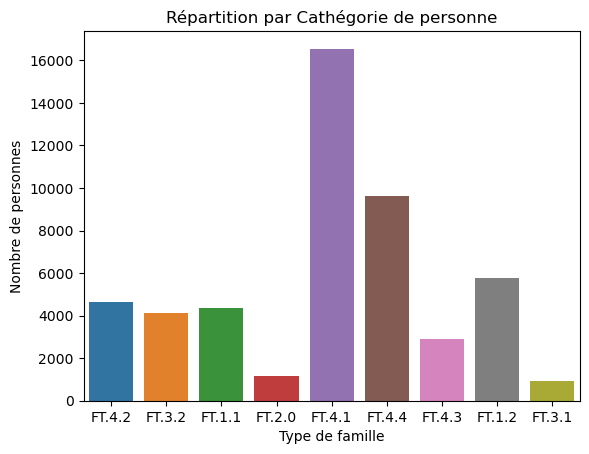

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.countplot(x='Familty_type', data=learn_dataset)
plt.xlabel('Type de famille')
plt.ylabel('Nombre de personnes')
plt.title('Répartition par Cathégorie de personne')
plt.show()


#### Commentaire : 
Notre jeu de données est composé principalement sinon en majorité de Famille formé d'un couple de 2 "actifs ayant un emploi" et de Famille formé d'un couple d'aucun "actif ayant un emploi". 
Ils forment à eux 2 près de 50% de notre jeu de données.

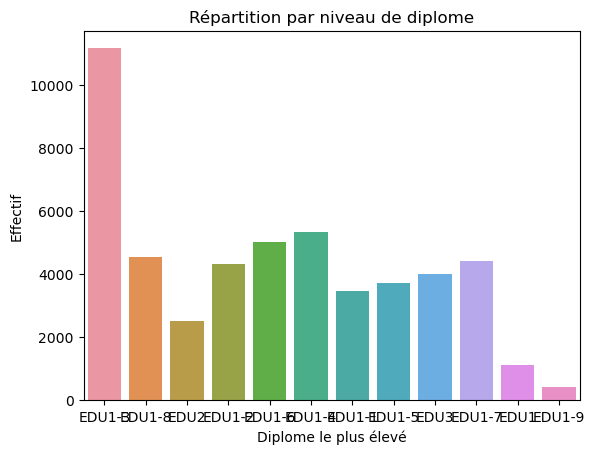

In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.countplot(x='Highest_diploma', data=learn_dataset)
plt.xlabel('Diplome le plus élevé')
plt.ylabel('Effectif')
plt.title('Répartition par niveau de diplome')
plt.show()

### Commentaires : 

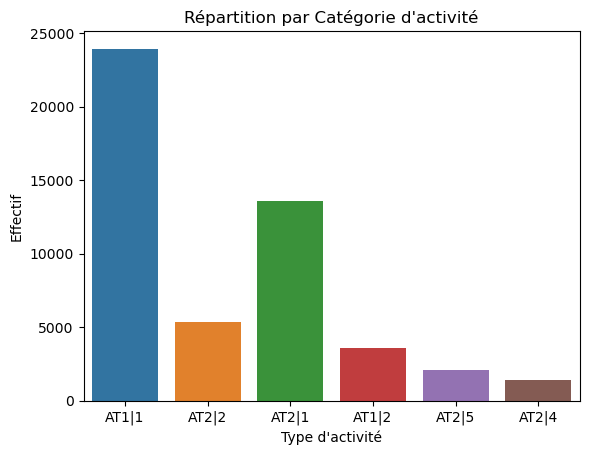

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.countplot(x='ACT', data=learn_dataset)
plt.xlabel('Type d\'activité')
plt.ylabel('Effectif')
plt.title('Répartition par Catégorie d\'activité')
plt.show()

### Commentaires : 

In [22]:
#pip install --upgrade numexpr

In [23]:
#pip install --upgrade bottleneck

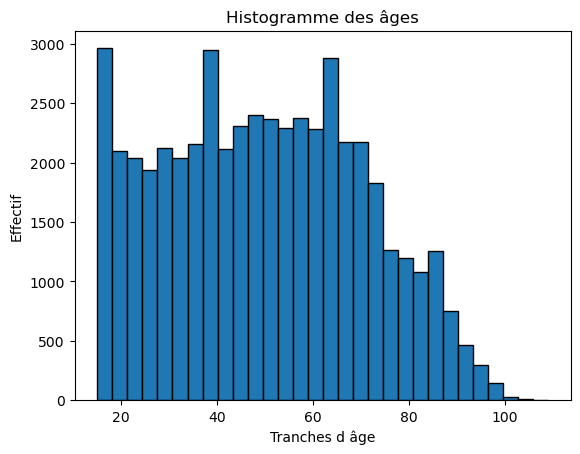

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Générer des données aléatoires
#data = np.random.randn(1000)

# Calculer l'histogramme
# Convertir la série 'age_2020' en un tableau NumPy
age_array = learn_dataset['age_2020'].values
hist, bins = np.histogram(age_array, bins=30)

# Afficher l'histogramme
plt.hist(age_array, bins=bins, edgecolor='black')
plt.xlabel("Tranches d âge")
plt.ylabel('Effectif')
plt.title('Histogramme des âges')
plt.show()


In [25]:
import pandas as pd


# 1. Créer des tranches d'âges
bins = [0, 18, 30, 40, 50, 60, 70, 120]  # Définir les limites des tranches d'âges
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']  # Étiquettes pour chaque tranche
learn_dataset['age_group'] = pd.cut(learn_dataset['age_2020'], bins=bins, labels=labels)

# 2. Obtenir des statistiques sur ces tranches
age_group_stats = learn_dataset.groupby('age_group')['age_2020'].describe()

# 3. Afficher les statistiques
print(age_group_stats)
print(learn_dataset['age_2020'].describe())


            count       mean       std   min   25%   50%   75%    max
age_group                                                            
0-18       2963.0  16.456294  1.105369  15.0  15.0  16.0  17.0   18.0
19-30      8193.0  24.499695  3.502305  19.0  21.0  24.0  28.0   30.0
31-40      7148.0  35.577504  2.849523  31.0  33.0  36.0  38.0   40.0
41-50      7628.0  45.643812  2.857602  41.0  43.0  46.0  48.0   50.0
51-60      7747.0  55.492061  2.862235  51.0  53.0  56.0  58.0   60.0
61-70      7280.0  65.457967  2.887294  61.0  63.0  65.0  68.0   70.0
70+        9034.0  80.348240  7.246543  71.0  74.0  79.0  86.0  109.0
count    49993.000000
mean        49.692197
std         20.692217
min         15.000000
25%         33.000000
50%         49.000000
75%         66.000000
max        109.000000
Name: age_2020, dtype: float64


#### Commentaire : 
75% de la population de notre groupe à moins de 66 ans donc fait partie de la trnache dit active.

In [26]:
### Déplacement de notre colonne Target

In [27]:
# 1. Extraire la colonne cible du premier DataFrame
#target_column = learn_dataset_merge['target']

# 2. Supprimer la colonne cible du premier DataFrame
#learn_dataset_merge.drop(columns=['target'], inplace=True)

# 3. Ajouter la colonne cible à la fin du DataFrame fusionné
#learn_dataset_merge['target'] = target_column


In [28]:
learn_dataset_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49993 entries, 0 to 49992
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uid                49993 non-null  int64  
 1   Familty_type       49993 non-null  object 
 2   Highest_diploma    49993 non-null  object 
 3   insee_code         49993 non-null  object 
 4   Job_42             49993 non-null  object 
 5   ACT                49993 non-null  object 
 6   sex                49993 non-null  object 
 7   Studying           49993 non-null  bool   
 8   age_2020           49993 non-null  int64  
 9   target             49993 non-null  float64
 10  WORK_CONDITION     19081 non-null  object 
 11  TERMS_OF_EMP       19081 non-null  object 
 12  working_hours      19075 non-null  float64
 13  JOB_DEP            19066 non-null  object 
 14  Eco_sect           19082 non-null  object 
 15  Employer_category  19081 non-null  object 
 16  job_category       190

### 4.2. Visualisation des données :

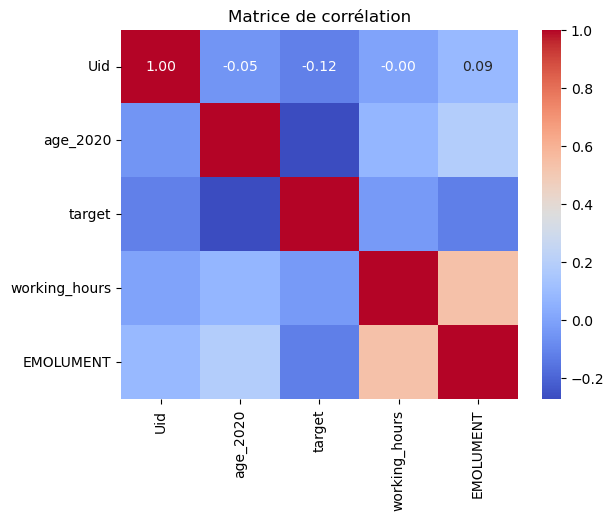

In [29]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = learn_dataset_merge.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

### Commentaires : 
Nous observons une corrélation négative modérée entre nos deux variables âge et la varibale cible (-0,27) :

- **Valeur négative**: Le signe négatif indique une relation inverse entre les variables. Cela signifie que lorsque la valeur de l'une des variables augmente, la valeur de l'autre variable diminue, et vice versa.
  
- **Modérée**: Une corrélation de -0,27 n'est pas très forte, mais elle indique tout de même une relation significative entre les deux variables. Elle suggère qu'il y a une tendance pour que lorsque l'âge augmente, la valeur de la variable cible diminue légèrement, et vice versa.

Dans le contexte de notre analyse, cela pourrait signifier que l'âge a une influence modérée sur la variable cible. Par exemple, dans un problème de prédiction de revenu, une corrélation négative modérée entre l'âge et le revenu pourrait signifier que les personnes plus âgées ont tendance à avoir des revenus légèrement plus faibles, Dans le cas espèce, nous ne pouvons pas aller plus loin, la variable cible étant inconnu.

Nous observons également une corrélation positive entre nos deux variables Emolument et Working_hours (0,53) :

- **Valeur positive**: Le signe positif indique une relation linéaire entre les variables. Cela signifie que lorsque la valeur de l'une des variables augmente, la valeur de l'autre variable augmente également, et vice versa.
  
- **Modérée**: Une corrélation de 0,53 n'est pas très forte, mais elle indique tout de même une relation significative entre les deux variables.

Dans ce cas, une corrélation de 0,53 entre le salaire annuel et le nombre total d'heures de travail suggère que, en général, les personnes gagnant des salaires annuels plus élevés ont tendance à travailler un plus grand nombre d'heures par an.

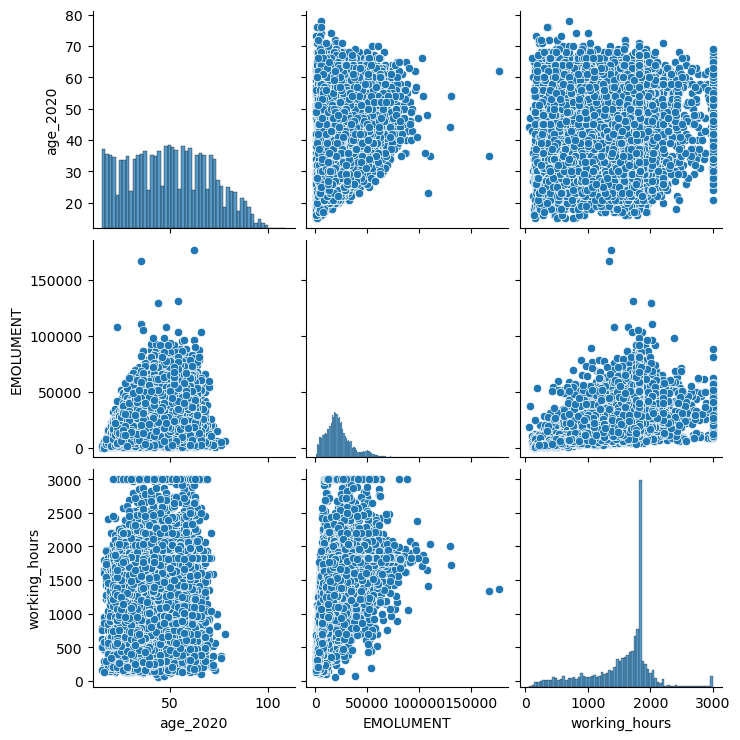

In [30]:
sns.pairplot(learn_dataset_merge[['age_2020', 'EMOLUMENT', 'working_hours']])
plt.show()

### Commentaires : 

In [31]:
# Vérifier les valeurs manquantes dans la colonne 'Job_desc'
missing_values = learn_dataset_merge['EMOLUMENT'].isna().sum()
missing_values = learn_dataset_merge['CLUB'].isna().sum()
print("Nombre de valeurs manquantes dans 'EMOLUMENT' :", missing_values)
print("Nombre de valeurs manquantes dans 'CLUB' :", missing_values)

# Remplacer les valeurs manquantes par une valeur par défaut, par exemple 'NaN'
learn_dataset_merge['WORK_CONDITION'].fillna('NaN', inplace=True)
learn_dataset_merge['TERMS_OF_EMP'].fillna('NaN', inplace=True)
##learn_dataset_merge['working_hours'].fillna('NaN', inplace=True)
learn_dataset_merge['JOB_DEP'].fillna('NaN', inplace=True)
learn_dataset_merge['Eco_sect'].fillna('NaN', inplace=True)
learn_dataset_merge['Employer_category'].fillna('NaN', inplace=True)
learn_dataset_merge['job_category'].fillna('NaN', inplace=True)
#learn_dataset_merge['Job_desc'].fillna('NaN', inplace=True)
##learn_dataset_merge['EMOLUMENT'].fillna('NaN', inplace=True)
learn_dataset_merge['employee_count'].fillna('NaN', inplace=True)
learn_dataset_merge['emp'].fillna('NaN', inplace=True)
##learn_dataset_merge['CLUB'].fillna('NaN', inplace=True)

Nombre de valeurs manquantes dans 'EMOLUMENT' : 22959
Nombre de valeurs manquantes dans 'CLUB' : 22959


In [32]:
# Remplacer les valeurs manquantes dans la colonne "CLUB" par "Club-000"
learn_dataset_merge['CLUB'].fillna('Club-000', inplace=True)

test_dataset_merge['CLUB'].fillna('Club-000', inplace=True)

learn_dataset_merge['CLUB'].info

<bound method Series.info of 0        Club-000
1        Club-000
2        club-109
3        club-106
4        Club-000
           ...   
49988    club-106
49989    club-103
49990    club-113
49991    club-101
49992    club-402
Name: CLUB, Length: 49993, dtype: object>

In [33]:
print(learn_dataset_merge['CLUB'].info)

<bound method Series.info of 0        Club-000
1        Club-000
2        club-109
3        club-106
4        Club-000
           ...   
49988    club-106
49989    club-103
49990    club-113
49991    club-101
49992    club-402
Name: CLUB, Length: 49993, dtype: object>


In [34]:
learn_dataset_merge['CLUB'].head()

0    Club-000
1    Club-000
2    club-109
3    club-106
4    Club-000
Name: CLUB, dtype: object

In [35]:
print(learn_dataset_merge['CLUB'].head)

<bound method NDFrame.head of 0        Club-000
1        Club-000
2        club-109
3        club-106
4        Club-000
           ...   
49988    club-106
49989    club-103
49990    club-113
49991    club-101
49992    club-402
Name: CLUB, Length: 49993, dtype: object>


In [36]:
# Remplacer les valeurs manquantes dans la colonne "CLUB" par "Club-000"
#learn_dataset_merge['Job_desc'].fillna('90', inplace=True)

#test_dataset_merge['Job_desc'].fillna('90', inplace=True)

#learn_dataset_merge['Job_desc'].info

In [37]:
learn_dataset_merge.head()

,Uid,Familty_type,Highest_diploma,insee_code,Job_42,ACT,sex,Studying,age_2020,target,...,working_hours,JOB_DEP,Eco_sect,Employer_category,job_category,Job_desc,EMOLUMENT,employee_count,emp,CLUB
0,1,FT.4.2,EDU1-3,01002,csp_5_2,AT1|1,Male,False,56,334.988013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,temp|1|6,Club-000
1,3,FT.3.2,EDU1-3,01004,csp_6_8,AT1|1,Male,True,19,385.059215,...,607.0,69,GZ,ct_9,A,685a,3097.0,tr_1,temp|1|1,Club-000
2,4,FT.1.1,EDU1-3,01004,csp_5_4,AT1|1,Male,False,47,311.387009,...,1792.0,71,FZ,ct_9,O,543h,25041.0,tr_1,temp|1|6,club-109
3,6,FT.4.2,EDU1-8,01004,csp_4_6,AT1|1,Male,False,28,281.922903,...,1824.0,73,GZ,ct_9,O,462e,30782.0,tr_1,temp|1|6,club-106
4,10,FT.2.0,EDU2,01004,csp_8_4,AT2|2,Male,True,16,602.748256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Club-000


# 

# 

# 

In [38]:
test_dataset_merge.head()

,Uid,Familty_type,Highest_diploma,insee_code,Job_42,ACT,sex,Studying,age_2020,WORK_CONDITION,...,working_hours,JOB_DEP,Eco_sect,Employer_category,job_category,Job_desc,EMOLUMENT,employee_count,emp,CLUB
0,2,FT.4.3,EDU1-3,01004,csp_4_8,AT1|2,Male,False,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,club-117
1,5,FT.4.4,EDU1-3,01004,csp_8_6,AT2|5,Female,False,72,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,club-105
2,7,FT.4.1,EDU1-5,01004,csp_5_4,AT1|1,Female,False,50,C,...,1820.0,01,OZ,ct_1,O,543g,27201.0,tr_3,temp|1|6,club-102
3,8,FT.4.3,EDU1-3,01004,csp_4_6,AT1|1,Female,False,55,C,...,1820.0,01,GZ,ct_9,O,461d,26576.0,tr_4,temp|1|6,club-102
4,9,FT.4.1,EDU1-5,01004,csp_6_3,AT1|1,Male,False,37,C,...,877.0,74,IZ,ct_9,O,636d,8897.0,tr_1,temp|1|5,club-117


In [39]:
#import pandas as pd


# Utilise get_dummies pour effectuer le One-Hot Encoding
#encoded_1 = pd.get_dummies(learn_dataset_merge, columns=['WORK_CONDITION'])
#encoded_2 = pd.get_dummies(encoded_1, columns=['Job_42'])
#encoded_3 = pd.get_dummies(encoded_2, columns=['ACT'])
#encoded_4 = pd.get_dummies(encoded_3, columns=['CLUB'])
#encoded_5 = pd.get_dummies(encoded_4, columns=['job_category'])
#encoded_6 = pd.get_dummies(encoded_5, columns=['TERMS_OF_EMP'])
#encoded_7 = pd.get_dummies(encoded_6, columns=['sex'])
#Learn_encoded = pd.get_dummies(encoded_6, columns=['emp'])

# Vous pouvez spécifier drop_first=True pour supprimer la première catégorie encodée de chaque variable
# Cela évite le piège de la colinéarité entre les variables
#Learn_encoded = pd.get_dummies(Learn_encoded, columns=['sex'], drop_first=True)

# Affichez les 5 premières lignes du DataFrame encodé
#Learn_encoded.head()

# 

In [40]:
from sklearn.preprocessing import LabelEncoder

# Initialiser un objet LabelEncoder
le = LabelEncoder()

# Appliquer le LabelEncoder à la colonne 'animal'


learn_dataset_merge['WORK_CONDITION'] = le.fit_transform(learn_dataset_merge['WORK_CONDITION'])
learn_dataset_merge['Job_42'] = le.fit_transform(learn_dataset_merge['Job_42'])
learn_dataset_merge['ACT'] = le.fit_transform(learn_dataset_merge['ACT'])
learn_dataset_merge['CLUB'] = le.fit_transform(learn_dataset_merge['CLUB'])
learn_dataset_merge['job_category'] = le.fit_transform(learn_dataset_merge['job_category'])
learn_dataset_merge['TERMS_OF_EMP'] = le.fit_transform(learn_dataset_merge['TERMS_OF_EMP'])
learn_dataset_merge['sex'] = le.fit_transform(learn_dataset_merge['sex'])
learn_dataset_merge['emp'] = le.fit_transform(learn_dataset_merge['emp'])
learn_dataset_merge['Job_desc'] = le.fit_transform(learn_dataset_merge['Job_desc'])
learn_dataset_merge['Familty_type'] = le.fit_transform(learn_dataset_merge['Familty_type'])
learn_dataset_merge['Highest_diploma'] = le.fit_transform(learn_dataset_merge['Highest_diploma'])
learn_dataset_merge['Eco_sect'] = le.fit_transform(learn_dataset_merge['Eco_sect'])
learn_dataset_merge['Employer_category'] = le.fit_transform(learn_dataset_merge['Employer_category'])
learn_dataset_merge['employee_count'] = le.fit_transform(learn_dataset_merge['employee_count'])


# Afficher le résultat
#print(learn_dataset_merge)


In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialiser un objet LabelEncoder
le = LabelEncoder()


test_dataset_merge['WORK_CONDITION'] = le.fit_transform(test_dataset_merge['WORK_CONDITION'])
test_dataset_merge['Job_42'] = le.fit_transform(test_dataset_merge['Job_42'])
test_dataset_merge['ACT'] = le.fit_transform(test_dataset_merge['ACT'])
test_dataset_merge['CLUB'] = le.fit_transform(test_dataset_merge['CLUB'])
test_dataset_merge['job_category'] = le.fit_transform(test_dataset_merge['job_category'])
test_dataset_merge['TERMS_OF_EMP'] = le.fit_transform(test_dataset_merge['TERMS_OF_EMP'])
test_dataset_merge['sex'] = le.fit_transform(test_dataset_merge['sex'])
test_dataset_merge['emp'] = le.fit_transform(test_dataset_merge['emp'])
test_dataset_merge['Job_desc'] = le.fit_transform(test_dataset_merge['Job_desc'])
test_dataset_merge['Familty_type'] = le.fit_transform(test_dataset_merge['Familty_type'])
test_dataset_merge['Highest_diploma'] = le.fit_transform(test_dataset_merge['Highest_diploma'])
test_dataset_merge['Eco_sect'] = le.fit_transform(test_dataset_merge['Eco_sect'])
test_dataset_merge['Employer_category'] = le.fit_transform(test_dataset_merge['Employer_category'])
test_dataset_merge['employee_count'] = le.fit_transform(test_dataset_merge['employee_count'])


# Afficher le résultat
#print(test_dataset_merge)

In [42]:
# 1. Extraire la colonne cible du premier DataFrame
target_column = learn_dataset_merge['target']

# 2. Supprimer la colonne cible du premier DataFrame
learn_dataset_merge.drop(columns=['target'], inplace=True)

# 3. Ajouter la colonne cible à la fin du DataFrame fusionné
learn_dataset_merge['target'] = target_column
#learn_dataset_merge.info()

In [43]:
# Sélectionner les colonnes numériques et booléennes
numeric_bool_cols = learn_dataset_merge.select_dtypes(include=['number', 'bool']).columns

# Créer un nouveau DataFrame avec uniquement les colonnes numériques et booléennes
Learn_encoded_num = learn_dataset_merge[numeric_bool_cols]

In [44]:
# Sélectionner les colonnes numériques et booléennes
numeric_bool_cols_test = test_dataset_merge.select_dtypes(include=['number', 'bool']).columns

# Créer un nouveau DataFrame avec uniquement les colonnes numériques et booléennes
test_encoded_num = test_dataset_merge[numeric_bool_cols_test]

# 

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [46]:
Learn_encoded_num.head()

,Uid,Familty_type,Highest_diploma,Job_42,ACT,sex,Studying,age_2020,WORK_CONDITION,TERMS_OF_EMP,working_hours,Eco_sect,Employer_category,job_category,Job_desc,EMOLUMENT,employee_count,emp,CLUB,target
0,1,6,3,19,0,1,False,56,2,4,NaN,30,0,1,403,NaN,0,6,0,334.988013
1,3,4,3,29,0,1,True,19,0,0,607.0,18,9,0,395,3097.0,2,1,0,385.059215
2,4,0,3,21,0,1,False,47,0,3,1792.0,17,9,2,242,25041.0,2,6,8,311.387009
3,6,6,8,16,0,1,False,28,0,3,1824.0,18,9,2,142,30782.0,2,6,5,281.922903
4,10,2,10,38,3,1,True,16,2,4,NaN,30,0,1,403,NaN,0,0,0,602.748256


### Remplacer les valeurs manquantes par la moyenne

In [47]:
# Créer une copie du DataFrame test_encoded_num
Learn_encoded_nums = Learn_encoded_num.copy()

# Remplacer les valeurs manquantes dans la copie
Learn_encoded_nums['working_hours'].fillna(Learn_encoded_num['working_hours'].mean(), inplace=True)
Learn_encoded_nums['EMOLUMENT'].fillna(Learn_encoded_num['EMOLUMENT'].mean(), inplace=True)
print(Learn_encoded_nums['working_hours'].isnull().any())
print(Learn_encoded_nums['EMOLUMENT'].isnull().any())

False
False


In [48]:
# Créer une copie du DataFrame test_encoded_num
Test_encoded_nums = test_encoded_num.copy()

# Remplacer les valeurs manquantes dans la copie
Test_encoded_nums['working_hours'].fillna(test_encoded_num['working_hours'].mean(), inplace=True)
Test_encoded_nums['EMOLUMENT'].fillna(test_encoded_num['EMOLUMENT'].mean(), inplace=True)


In [49]:
Test_encoded_nums

,Uid,Familty_type,Highest_diploma,Job_42,ACT,sex,Studying,age_2020,WORK_CONDITION,TERMS_OF_EMP,working_hours,Eco_sect,Employer_category,job_category,Job_desc,EMOLUMENT,employee_count,emp,CLUB
0,2,7,3,18,1,1,False,40,3,6,1508.423023,37,9,3,410,22898.078718,7,9,16
1,5,8,3,40,5,0,False,72,3,6,1508.423023,37,9,3,410,22898.078718,7,9,4
2,7,5,5,21,0,0,False,50,0,3,1820.000000,30,0,1,248,27201.000000,3,5,2
3,8,7,3,16,0,0,False,55,0,3,1820.000000,18,8,1,140,26576.000000,4,5,2
4,9,5,5,25,0,1,False,37,0,4,877.000000,20,8,1,357,8897.000000,1,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49987,99965,4,2,35,2,0,False,83,3,6,1508.423023,37,9,3,410,22898.078718,7,9,0
49988,99967,5,11,21,0,0,False,64,2,3,1568.000000,31,7,1,242,19073.000000,1,5,1
49989,99973,0,5,39,5,1,False,26,3,6,1508.423023,37,9,3,410,22898.078718,7,9,5
49990,99976,1,10,40,2,0,False,89,3,6,1508.423023,37,9,3,410,22898.078718,7,9,0


In [50]:
Learn_encoded_nums

,Uid,Familty_type,Highest_diploma,Job_42,ACT,sex,Studying,age_2020,WORK_CONDITION,TERMS_OF_EMP,working_hours,Eco_sect,Employer_category,job_category,Job_desc,EMOLUMENT,employee_count,emp,CLUB,target
0,1,6,3,19,0,1,False,56,2,4,1517.366448,30,0,1,403,23145.556807,0,6,0,334.988013
1,3,4,3,29,0,1,True,19,0,0,607.000000,18,9,0,395,3097.000000,2,1,0,385.059215
2,4,0,3,21,0,1,False,47,0,3,1792.000000,17,9,2,242,25041.000000,2,6,8,311.387009
3,6,6,8,16,0,1,False,28,0,3,1824.000000,18,9,2,142,30782.000000,2,6,5,281.922903
4,10,2,10,38,3,1,True,16,2,4,1517.366448,30,0,1,403,23145.556807,0,0,0,602.748256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49988,99980,8,6,16,0,1,False,27,0,6,951.000000,29,9,2,146,11943.000000,1,2,5,285.313635
49989,99982,2,6,10,0,0,False,57,0,3,1813.000000,24,9,2,55,39930.000000,7,6,3,265.463420
49990,99983,8,3,19,1,1,False,34,2,4,1517.366448,30,0,1,403,23145.556807,0,0,12,523.862954
49991,99984,7,8,10,1,1,False,62,2,4,1517.366448,30,0,1,403,23145.556807,0,0,1,433.191678


In [51]:
# Cible (Y) quality
# variables explicatives (X) les autres
y = Learn_encoded_nums["target"]
x = Learn_encoded_nums.drop(["target"], axis=1)

# Apprentissage/test
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)


In [52]:
X_test = Test_encoded_nums

## 5. Sélection des algorithmes d'apprentissage supervisé : <a id="section-5"></a>

In [53]:
### 6.1 Modèle Linéaire

In [54]:
model_linear = LinearRegression()

In [55]:
### 6.2 Random Forest

In [56]:
model_rf = RandomForestRegressor()

In [57]:
### 6.3 Plus proches voisins

In [58]:
model_knn = KNeighborsRegressor()

In [59]:
### 6.4 SVM

In [60]:
model_svm = SVR()

### Entrainons les modèles

In [61]:
model_linear.fit(x_train, y_train)

LinearRegression()

In [62]:
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
model_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [64]:
model_svm.fit(x_train, y_train)

SVR()

### Prédictions sur l'ensemble de tests

In [65]:
predictions_linear = model_linear.predict(x_test)

In [66]:
predictions_linear

array([375.71076586, 453.9763946 , 326.90908233, ..., 591.33693411,
       623.59337937, 218.0634448 ])

In [67]:
predictions_rf = model_rf.predict(x_test)

In [68]:
predictions_rf

array([468.81280481, 533.92955234, 440.39929562, ..., 710.07137928,
       754.8267908 , 385.64144606])

In [69]:
predictions_knn = model_knn.predict(x_test)

In [70]:
predictions_knn

array([399.47604719, 389.04754746, 408.10262965, ..., 672.24720647,
       633.08304384, 461.03692416])

In [71]:
predictions_svm = model_svm.predict(x_test)

In [72]:
predictions_svm

array([447.27277197, 420.56190798, 431.83775253, ..., 446.52237203,
       436.83789582, 409.36406393])

### Évaluations des performances des modèles

In [73]:
mse_linear = mean_squared_error(y_test, predictions_linear)
mse_rf = mean_squared_error(y_test, predictions_rf)
mse_knn = mean_squared_error(y_test, predictions_knn)
mse_svm = mean_squared_error(y_test, predictions_svm)

### Coefficient de détermination des modèles

#### Sur l'ensemble de test

In [74]:
from sklearn.metrics import r2_score
print("le R2 pour le model_linear est : ", r2_score(y_test, predictions_linear))
print("le R2 pour le random forest est : ", r2_score(y_test, predictions_rf))
print("le R2 pour le Knn model est : ", r2_score(y_test, predictions_knn))
print("le R2 pour le Svm model est : ", r2_score(y_test, predictions_svm))

le R2 pour le model_linear est :  0.47006075466044817
le R2 pour le random forest est :  0.8094992482276947
le R2 pour le Knn model est :  0.4034202300066212
le R2 pour le Svm model est :  0.032121128200017446


Le Random forest apparait avec le le meilleur coefficient de détermination, il explique environ 80% de la variance dans les données de test.
Un R2 de 0.032 n'est pas très élevé, ce qui indique que le modèle Svm ne parvient pas à capturer une grande partie de la variance des données de test. Cela peut être dû à une sous-ajustement (underfitting) du modèle, où le modèle est trop simple pour capturer la complexité des données.

#### Sur l'ensemble d'entraînement

In [75]:
print("le R2 pour le model_linear est : ",r2_score(y_train, model_linear.predict(x_train)))
print("le R2 pour le random forest est : ",r2_score(y_train, model_rf.predict(x_train)))
print("le R2 pour le Knn linear est : ",r2_score(y_train, model_knn.predict(x_train)))
print("le R2 pour le Svm linear est : ",r2_score(y_train, model_svm.predict(x_train)))

le R2 pour le model_linear est :  0.46310029102899775
le R2 pour le random forest est :  0.9736370129389976
le R2 pour le Knn linear est :  0.6158522316544622
le R2 pour le Svm linear est :  0.0325167284977641


Le même modèle explique environ 97,3% de la variance dans les données d'entraînement.
Un R2 de  0.97 pour l'ensemble d'entraînement est plus élevé que celui pour l'ensemble de test, ce qui est souvent le cas. Cela peut indiquer un certain surajustement (overfitting) du modèle aux données d'entraînement. Le modèle peut être trop complexe et avoir appris le bruit présent dans les données d'entraînement.
Même remarque avec le Knn model ou nous passons de 37% à 60%. Les deux autres apparaissent raisonnables.

### Comparaison ses performances des différents modèles choisis

In [76]:
performances = {'Linear Regression': mse_linear, 'Random Forest': mse_rf, 'K-Nearest Neighbors': mse_knn, 'Support Vector Machine': mse_svm}
print(performances)

{'Linear Regression': 11058.921598765703, 'Random Forest': 3975.423403499752, 'K-Nearest Neighbors': 12449.594857876906, 'Support Vector Machine': 20197.96920962053}


#### Interpretation

Nos résultats montrent les performances des différents modèles en termes d'erreur quadratique moyenne (MSE) sur un ensemble de données de test. 
Ci-après une interpretation des résultats :

- **Linear Regression**: L'erreur quadratique moyenne obtenue avec la régression linéaire est d'environ 11050.77.

- **Random Forest**: L'erreur quadratique moyenne obtenue avec le modèle de forêt aléatoire est d'environ 3992.39.

- **K-Nearest Neighbors**: L'erreur quadratique moyenne obtenue avec le modèle de k-plus proches voisins est d'environ 13100.18.

- **Support Vector Machine**: L'erreur quadratique moyenne obtenue avec le modèle de machine à vecteurs de support est d'environ 20197.93.

En général, des valeurs de MSE plus faibles indiquent de meilleures performances du modèle, car cela signifie que les prédictions du modèle sont plus proches des vraies valeurs. Ainsi, dans ce cas, le modèle Random Forest semble être le plus performant, suivi par la régression linéaire, les k-plus proches voisins et enfin la machine à vecteurs de support.

Cependant les résultas du random Forest nous semble malgré tout assez élevé, nous souhaitons donc d'utiliser d'autres approches plus robuste afin d'améliorer les résultats de prédiction.

# 

## 6. Approche complexe  <a id="section-6"></a>

### 6.1  Approche polynomiale

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Créer un pipeline avec PolynomialFeatures pour ajouter des interactions et des termes polynomiaux
model_poly = make_pipeline(PolynomialFeatures(degree=2), KNeighborsRegressor())


#### Entrainement du modèle

In [78]:
model_poly.fit(x_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('kneighborsregressor', KNeighborsRegressor())])

# 

# 

# 

#### Prédiction

In [79]:
prediction_poly = model_poly.predict(x_test)


#### Évaluation du modèle

In [80]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, prediction_poly)
r2 = r2_score(y_test, prediction_poly)

print("MSE :", mse)
print("R2 Score :", r2)

MSE : 13299.646325422014
R2 Score : 0.362686092488103


#### 
Ces résultats sont plus élevés que ceux obtenus avec le random forest plus haut.

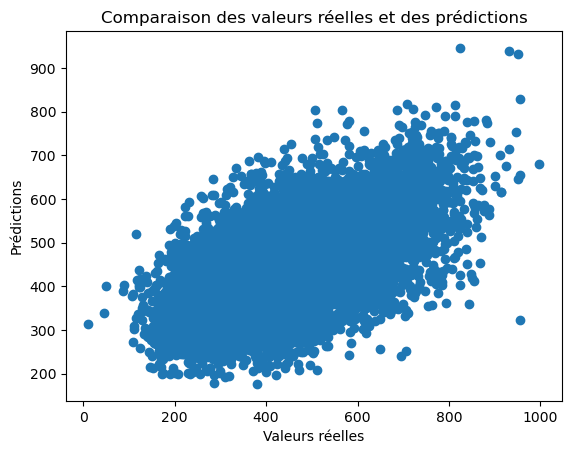

In [81]:
# Visualisation des prédictions par rapport aux valeurs réelles
plt.scatter(y_test, prediction_poly)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des valeurs réelles et des prédictions")
plt.show()

# 

### 6.2 Utilisons des techniques de régularisation : un modèle Ridge

In [82]:


from sklearn.linear_model import Ridge

# Utiliser la régression ridge pour ajouter de la régularisation
model_ridge = Ridge(alpha=0.5)  # Nous choisissons alpha = 0.5 en fonction de la force de régularisation souhaitée

In [83]:
model_ridge.fit(x_train, y_train)


Ridge(alpha=0.5)

#### Évaluation du modèle : 

In [84]:
prediction_ridge = model_ridge.predict(x_test)

#### Analyse des performances : 

In [85]:
mse = mean_squared_error(y_test, prediction_ridge)
r2 = r2_score(y_test, prediction_ridge)

In [86]:
print("mse_ridge :", mse)
print("R2_ridge :", r2)

mse_ridge : 11058.918878376611
R2_ridge : 0.4700608850204412


### Interpretation des résultats obtenu avec le modèle ridge

Notre **MSE** de **11050.79** indique que les prédictions du modèle, en moyenne, s'écartent de la vraie valeur cible d'environ 11050.79 unités
Notre **R2** de **0.47** signifie que le modèle explique environ 47% de la variance totale des données de test.

Notre modèle Ridge semble avoir des performances raisonnables, mais il y a encore de la place pour l'amélioration, surtout si nous cherchons à réduire l'erreur de prédiction et à augmenter la proportion de variance expliquée par le modèle.

#### Optimisation des hyperparamètres : 

In [87]:
from sklearn.model_selection import GridSearchCV

# Exemple d'optimisation des hyperparamètres
grid_search = GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.1, 0.5, 1.0]}, cv=5)
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']

In [88]:
# Créer un nouveau modèle Ridge avec le meilleur alpha
best_ridge_model = Ridge(alpha=best_alpha)

# Entraîner le modèle sur l'ensemble d'entraînement complet
best_ridge_model.fit(x_train, y_train)


Ridge()

#### Évaluons les performances du modèle

In [89]:
# Faire des prédictions sur l'ensemble de test
predictions_rdg = best_ridge_model.predict(x_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, predictions_rdg)

# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_test, predictions_rdg)

# Afficher les performances
print("MSE:", mse)
print("R²:", r2)


MSE: 11058.916168677742
R²: 0.4700610148681629


#### Analyse des coefficients du modèle

In [90]:
# Obtenir les coefficients de régression
coefficients = best_ridge_model.coef_

# Afficher les coefficients
for feature, coef in zip(x_train.columns, coefficients):
    print(feature, ":", coef)


Uid : -0.0005266174024338466
Familty_type : -3.0327784065246988
Highest_diploma : -5.27219410451327
Job_42 : 0.08136971330461966
ACT : 34.22575605817072
sex : 28.297580835199543
Studying : -7.509424265152476
age_2020 : -2.840972022446897
WORK_CONDITION : 8.328986296819764
TERMS_OF_EMP : 25.417215339010944
working_hours : -0.00027460207902695543
Eco_sect : 0.2424178138519283
Employer_category : 2.8143516125297854
job_category : 25.83887528979055
Job_desc : 0.4327389324698308
EMOLUMENT : 0.0011687093354819976
employee_count : 4.811255653533696
emp : -3.58352037864475
CLUB : -0.041182024170218906


# 

# 

# 

#### Interpretation 

Pour analyser les coefficients du modèle, Nous pouvons considérer les points suivants :

1. **Importance des caractéristiques** : Les coefficients indiquent l'importance relative de chaque caractéristique dans la prédiction de la variable cible. Les caractéristiques avec des coefficients plus importants ont un impact plus important sur les prédictions. Dans notre cas : ACT, job_category, sex, TERMS_OF_EMP et Studying

2. **Interprétation de signe** : Le signe du coefficient indique la direction de la relation entre la caractéristique et la variable cible. Un coefficient positif signifie qu'une augmentation de la valeur de la caractéristique est associée à une augmentation de la variable cible, ( ici **ACT, sex, : les types d'activités, le sexe des individus**)  tandis qu'un coefficient négatif signifie l'opposé (ici job_category_cod, Studying : les variables encodées des cathégories de jobs et la variable qui renseigne si l'individu est étudiant ou pas) .

3. **Magnitude des coefficients** : Plus la valeur absolue d'un coefficient est grande, plus l'impact de la caractéristique correspondante sur la variable cible est important. Les coefficients avec une magnitude élevée peuvent indiquer des relations fortes entre les caractéristiques et la variable cible.

4. **Comparaison avec d'autres coefficients** : Comparons les coefficients entre eux pour évaluer leur importance relative. Les caractéristiques avec des coefficients plus importants peuvent être considérées comme ayant un plus grand pouvoir prédictif.

En analysant nos coefficients nous pouvons conclure :

- Les caractéristiques avec des coefficients négatifs (comme 'Uid', 'Studying', 'age_2020', etc.) ont une relation négative avec la variable cible. Cela signifie que lorsque ces caractéristiques augmentent, la variable cible a tendance à diminuer, et vice versa.

- À l'inverse, les caractéristiques avec des coefficients positifs (comme 'ACT', 'sex', 'TERMS_OF_EMP', etc.) ont une relation positive avec la variable cible. Cela signifie qu'une augmentation de ces caractéristiques est associée à une augmentation de la variable cible, et vice versa.

- Les caractéristiques avec des coefficients proches de zéro ont moins d'impact sur la variable cible.

- La magnitude des coefficients peut être utilisée pour comparer l'importance relative des caractéristiques. Par exemple, 'ACT' a un coefficient relativement élevé, ce qui suggère qu'il a un impact plus important sur la variable cible par rapport aux autres caractéristiques.

#### Visualisations les prédictions du modèle

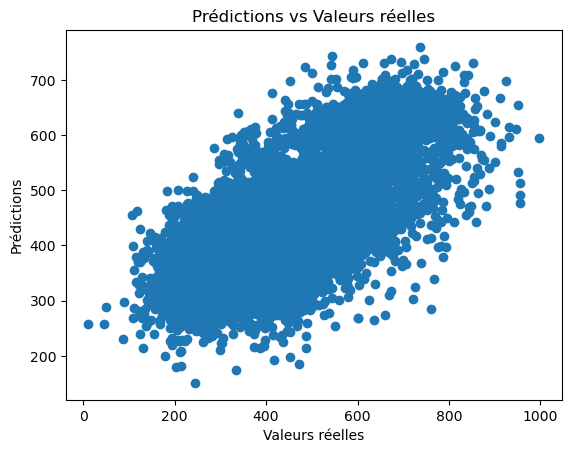

In [91]:
import matplotlib.pyplot as plt

# Tracer les prédictions par rapport aux valeurs réelles
plt.scatter(y_test, predictions_rdg)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles")
plt.show()


Nous observons une dispersion entre les valeurs réels de notre ensemmble d'entrainement et celles qui ont été prédicte via le modèle de rigde 

#### Analyse des résidus

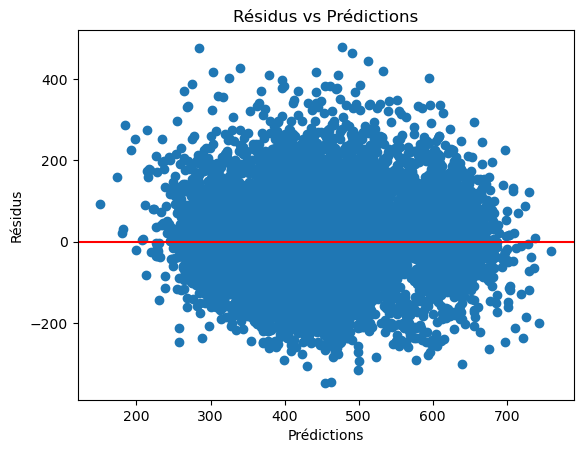

In [92]:
#%% [hide]

# Calculer les résidus
residuals = y_test - predictions_rdg

# Tracer les résidus
plt.scatter(predictions_rdg, residuals)
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Résidus vs Prédictions")
plt.show()


### 6.3 Utiliser les meilleures valeurs d'hyperparamètres : KNeighborsRegressor
####  GridSearchCV 

In [93]:
# Effectuons une sélection de caractéristiques :

from sklearn.feature_selection import SelectKBest, f_regression

# Utiliser SelectKBest pour sélectionner les k meilleures caractéristiques
selector = SelectKBest(score_func=f_regression, k=10)  # Choisissons le nombre de caractéristiques à conserver
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)


In [94]:
# Utilisons la validation croisée :

from sklearn.model_selection import GridSearchCV

# Utiliser GridSearchCV pour effectuer une recherche sur une grille de paramètres
param_grid = {'n_neighbors': [5, 10, 15]}  # Spécifiez les hyperparamètres à rechercher
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_


In [95]:
best_model

KNeighborsRegressor()

#### Évaluation du modèle : 

In [96]:
# Faire des prédictions sur l'ensemble de test
predictions_Knn = best_model.predict(x_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, predictions_Knn)
r2 = r2_score(y_test, predictions_Knn)
print("MSE:", mse)
print("R2:", r2)


MSE: 12449.594857876906
R2: 0.4034202300066212


# 

# 

### 6.4 Gradient Boosting


####  Recherche des meilleures valeurs d'hyperparamètres : GradientBoosting

####  GridSearchCV 

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Définition du modèle
model = GradientBoostingRegressor()

# Définition de la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

In [100]:
# Recherche des meilleurs hyperparamètres ((Attention ce code à pris trop de temps à tourner))
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

# 

# 

In [101]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}

In [102]:
best_model = grid_search.best_estimator_
best_model

GradientBoostingRegressor(learning_rate=0.5, max_depth=5, n_estimators=200)

In [103]:
#  Afficher les meilleurs hyperparamètres et le meilleur score
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleur score de validation croisée :", grid_search.best_score_)

Meilleurs hyperparamètres : {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 200}
Meilleur score de validation croisée : -1598.4756129892992


#### Entrainons le modèle final :  sur toutes les données d'entrainement

In [105]:
# Utilisez les meilleurs paramètres trouvés pour GradientBoostingRegressor 
best_params_gb = {'n_estimators': 200, 'learning_rate': 0.5, 'max_depth': 5} 

# Initialisez le modèle GradientBoostingRegressor avec les meilleurs paramètres
final_model = GradientBoostingRegressor(**best_params_gb)


# Entraînez le modèle final
final_model.fit(x_train, y_train)


GradientBoostingRegressor(learning_rate=0.5, max_depth=5, n_estimators=200)

#### Interprétation des résultats :

**Learning_rate**: 0.5 : indique  la vitesse à laquelle le modèle d'apprentissage s'ajuste aux erreurs. Une valeur plus élevée signifie un ajustement plus rapide, mais cela peut rendre le modèle instable.

**Max_depth**: 5 : indique la profondeur maximale de chaque arbre de décision dans l'algorithme de boosting. Une valeur plus élevée permet au modèle de capturer des relations plus complexes dans les données, mais cela peut entraîner un surapprentissage.

**N_estimators**: 200 : C'est le nombre d'estimateurs (ou arbres) dans l'algorithme de boosting. Une valeur plus élevée peut améliorer les performances du modèle, mais cela nécessite également plus de temps de calcul.
Ces valeurs sont celles qui ont donné la meilleure performance sur l'ensemble d'entraînement pendant la recherche des hyperparamètres. 

Nous utiliserons ces valeurs pour entraîner notre modèle final afin d'obtenir de meilleures performances sur de nouveaux ensembles de données.

#### Évaluation du modèle : 

In [106]:
# Faire des prédictions sur l'ensemble de test
predictions_GB = final_model.predict(x_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, predictions_GB)
r2 = r2_score(y_test, predictions_GB)
print("MSE:", mse)
print("R2:", r2)


MSE: 1547.4058916382537
R2: 0.9258489082208272


#### __Interpretation des résultats__

Notre nouveau **MSE** est de **1547.40** (est assez basse) , ce qui suggère que le modèle a une bonne capacité à prédire les valeurs cibles sur l'ensemble de test.

Notre coefficient de détermination **R^2** est de **92 %** ce qui indique que le modèle a une bonne capacité à capturer la relation entre les variables d'entrée et la variable cible

En somme, les résultats indiquent que le modèle avec les meilleurs hyperparamètres identifiés a une très bonne performance de prédiction sur l'ensemble de test, avec une faible erreur moyenne et une grande capacité à expliquer la variance des données. Cela suggère que le modèle est bien généralisé et peut être utilisé avec confiance pour faire des prédictions sur de nouvelles données.

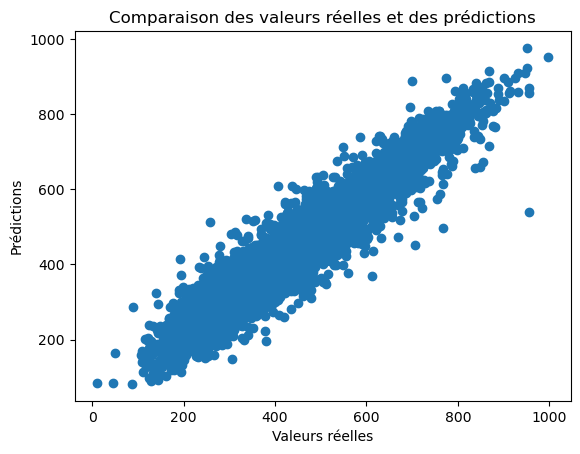

In [107]:
# Visualisation des prédictions par rapport aux valeurs réelles
plt.scatter(y_test, predictions_GB)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison des valeurs réelles et des prédictions")
plt.show()

#### Application de la cross validation

In [108]:
# Appliquer la validation croisée avec 5 plis ( Note pour moi même : ce code prend énormement de temps à charger)
scores = cross_val_score(final_model, x, y, cv=5)

In [109]:
# Afficher les scores de validation croisée
print("Scores de validation croisée :", scores)

Scores de validation croisée : [0.20560329 0.64464225 0.65098398 0.80114312 0.72968087]


In [110]:
# Afficher la précision moyenne
print("Précision moyenne :", scores.mean())

Précision moyenne : 0.6064107019636509


Les résultats obtenus indiquent que le modèle a obtenu des performances variables sur les différents plis de validation croisée, mais dans l'ensemble, il semble avoir une précision moyenne de 0.60, ce qui suggère une performance **raisonnablement bonne**

#### Analyse des Coefficients

In [111]:
# Afficher l'importance des caractéristiques
feature_importances = final_model.feature_importances_
feature_names = x.columns
for feature, importance in zip(feature_names, feature_importances):
    print(feature, ":", importance)


Uid : 0.18315552189943118
Familty_type : 0.0588153123816373
Highest_diploma : 0.04926268641958457
Job_42 : 0.3619709034494909
ACT : 0.039652237066869676
sex : 0.006308048672529434
Studying : 0.007422143766916117
age_2020 : 0.06648905458426867
WORK_CONDITION : 0.0034816669653254025
TERMS_OF_EMP : 0.010275855443199953
working_hours : 0.005439682782568466
Eco_sect : 0.017114104291208306
Employer_category : 0.006468710362505667
job_category : 0.00046522162964173646
Job_desc : 0.1441879451558364
EMOLUMENT : 0.01165589746251812
employee_count : 0.005576248079980033
emp : 0.011141543908703198
CLUB : 0.011117215677784847


#### Interpretation des résultats
Nos coefficients sont tous positifs dans ce modèle. (cf interpretation précédente).

/Users/tachalola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/__init__.py:17: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.sparse import issparse
/Users/tachalola/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/__init__.py:17: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.sparse import issparse


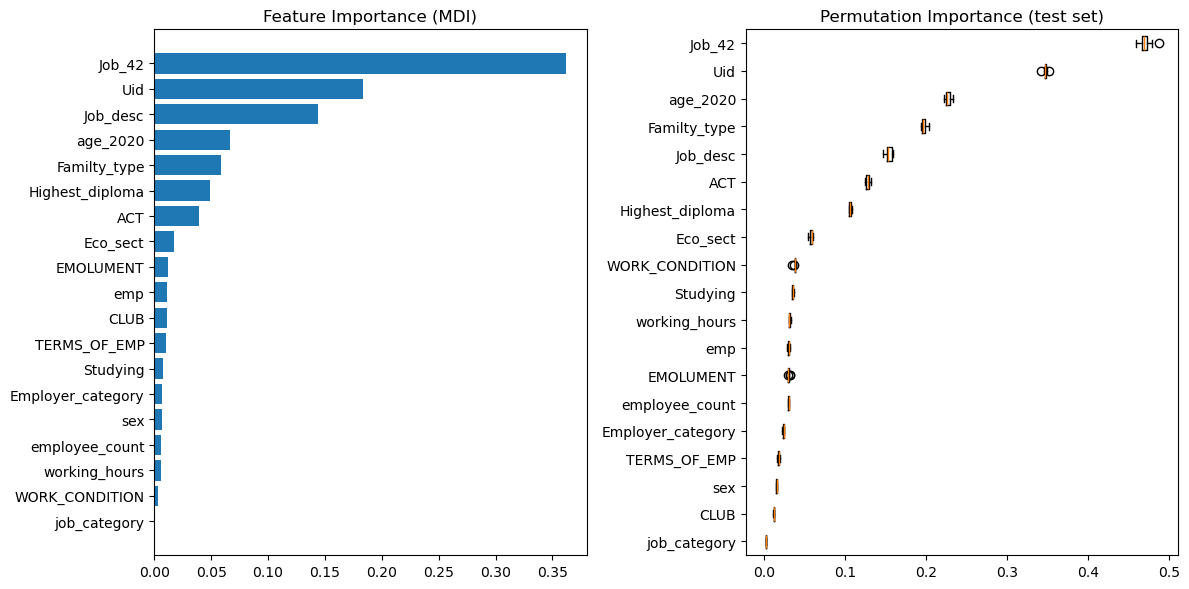

In [112]:
from sklearn.inspection import permutation_importance

# Votre code précédent ici

feature_importance = final_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(Learn_encoded_num.columns)[sorted_idx])  # Remplacez cette ligne
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    final_model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2  # Correction ici
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(Learn_encoded_num.columns)[sorted_idx],  # Et cette ligne
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


#### Interpretation : 
Les barres les plus longues (caractéristiques de l'emploi, leur age, le type de famille ) correspondent aux variables les plus importantes pour la prédiction du modèle.

ces dernières assez éloignés de l'origine sont considérées comme plus importantes car leur permutation aléatoire entraîne une plus grande baisse de performance du modèle. Ces points indiquent la sensibilité du modèle aux changements dans ces caractéristiques.

# 

## 7. Prédiction avec le modèle final sur l'ensemble de Test  <a id="section-7"></a>


In [113]:
Y_pred_final = final_model.predict(X_test)

In [129]:
Uid = Test_encoded_nums["Uid"]
Uid_test = x_test["Uid"]

### 7.1 Exportons les prédictions dans un fichier Csv

In [131]:
predictions_merge = pd.DataFrame({'Uid' : Uid_test,'Linear Regression': predictions_linear, 'Random Forest': predictions_rf, 'K-Nearest Neighbors': predictions_knn, 'Support Vector Machine': predictions_svm, 'KNeighborsRegressor': predictions_Knn, 'Ridge': prediction_ridge, 'model_poly': prediction_poly,  'GradientBoostingRegressor': predictions_GB, 'Valeurs réelles': y_test})
duplicated_indexes = predictions_merge.index[predictions_merge.index.duplicated()]
print("Indexes dupliqués :", duplicated_indexes)

Indexes dupliqués : Int64Index([], dtype='int64')


In [132]:
predictions_merge.to_csv('predictions_merge.csv', index=False)

In [133]:
Prediction = pd.DataFrame({"Uid" : Uid, "Target": Y_pred_final})
Prediction.to_csv("Prediction.csv", index=False)